In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
# cell border experimental code: 

import numpy as np
from scipy.spatial import ConvexHull


In [2]:
df = pd.read_csv('data/cluster_position _Detailed.csv', skiprows=3)
df 

,Position X,Position Y,Position Z,Unit,Category,Collection,Time,ID,Unnamed: 8
0,49529.578,44229.441,1.116,µm,Surface,Position,1,0,NaN
1,49467.621,44290.391,0.977,µm,Surface,Position,1,1,NaN
2,49515.867,44246.172,0.776,µm,Surface,Position,1,2,NaN
3,49315.445,44443.277,2.803,µm,Surface,Position,1,3,NaN
4,49557.926,44204.316,2.187,µm,Surface,Position,1,4,NaN
...,...,...,...,...,...,...,...,...,...
20219,47583.918,41356.871,3.285,µm,Surface,Position,1,20219,NaN
20220,47669.691,41268.441,-1.012,µm,Surface,Position,1,20220,NaN
20221,47700.023,41240.758,0.904,µm,Surface,Position,1,20221,NaN
20222,47647.992,41296.988,0.550,µm,Surface,Position,1,20222,NaN


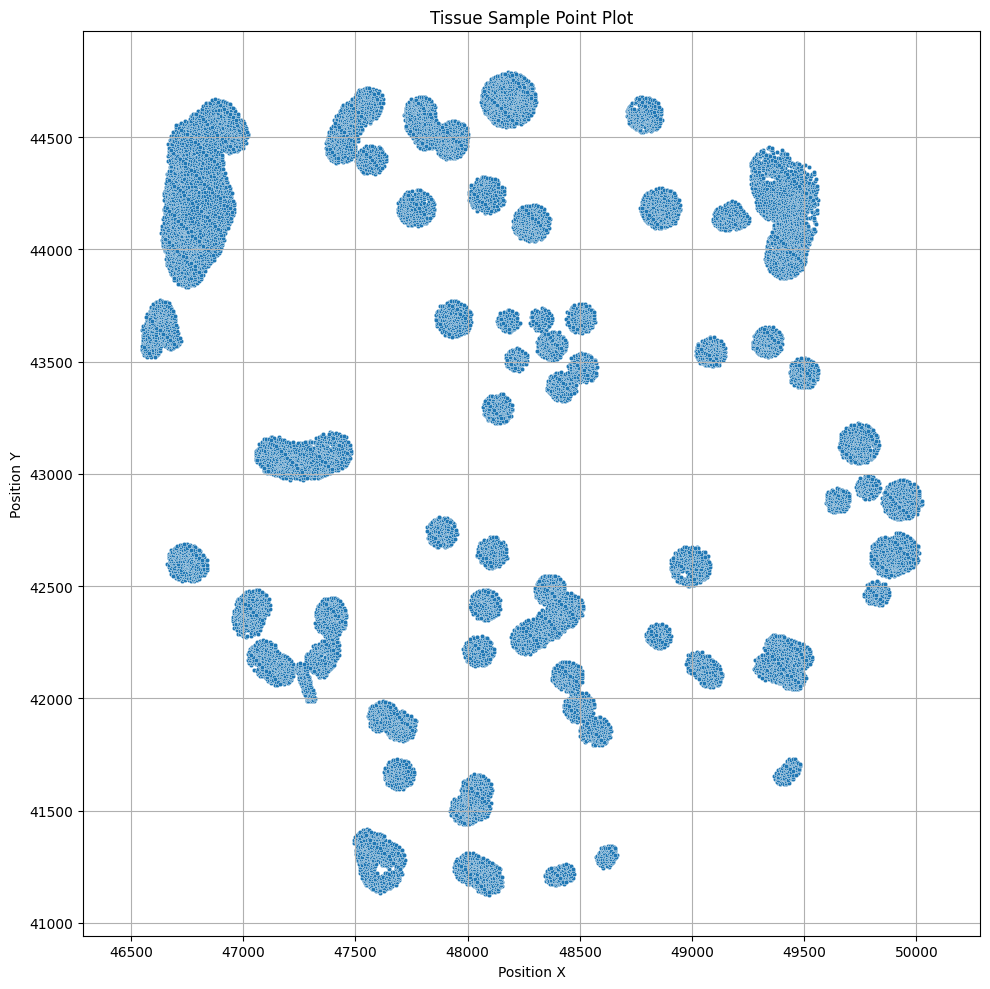

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the figure
plt.figure(figsize=(10, 10))  # 10x10 is a good middle ground for detail

# Plot using seaborn
sns.scatterplot(data=df, x='Position X', y='Position Y', s=10)  # s=10 for dot size

# Optional enhancements
plt.title('Tissue Sample Point Plot')
plt.xlabel('Position X')
plt.ylabel('Position Y')
plt.axis('equal')  # Keep aspect ratio square for spatial data
plt.grid(True)
plt.tight_layout()

plt.show()


Best number of clusters detected: 10


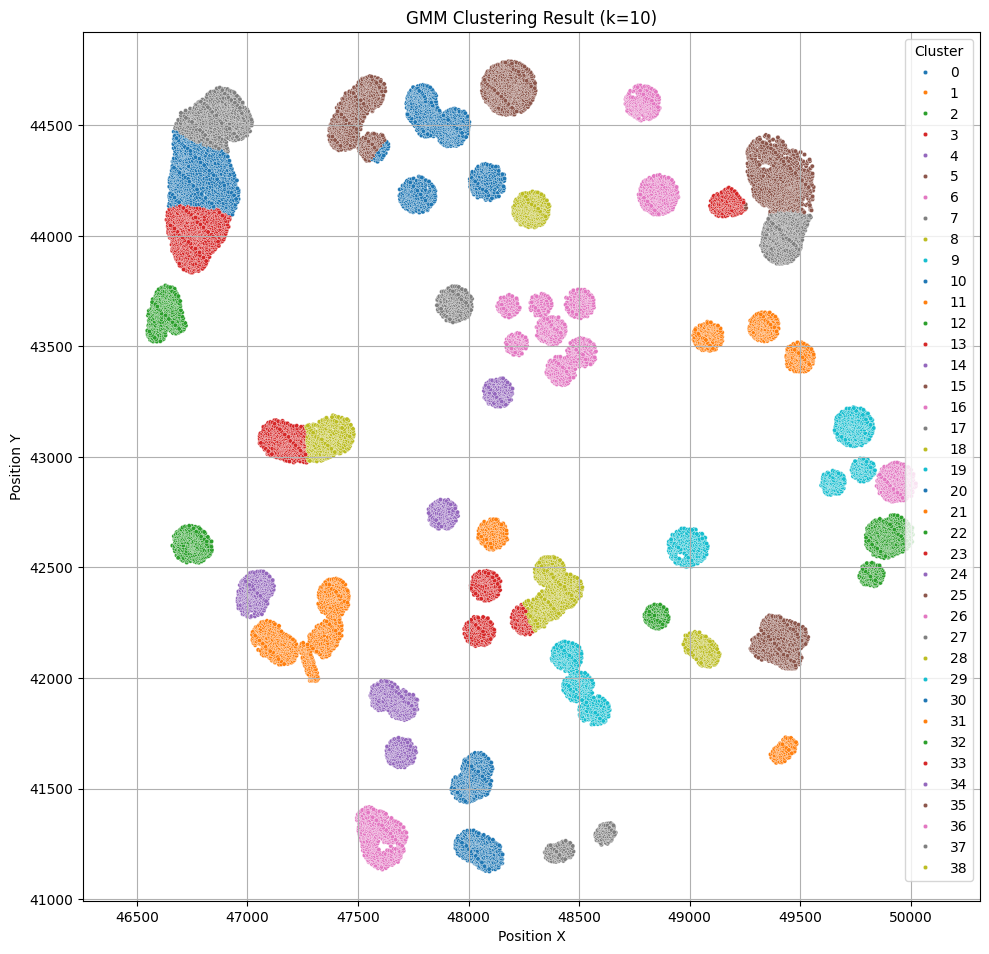

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import numpy as np

# Step 1: Prepare data
X = df[['Position X', 'Position Y']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Fit GMMs with different number of clusters and compute BIC
bic_scores = []
models = []
for k in range(30, 40):
    gmm = GaussianMixture(n_components=k, covariance_type='spherical', random_state=0)
    gmm.fit(X_scaled)
    bic_scores.append(gmm.bic(X_scaled))
    models.append(gmm)

# Step 3: Select best model (lowest BIC)
best_k = np.argmin(bic_scores) + 1
best_gmm = models[best_k - 1]
print(f"Best number of clusters detected: {best_k}")

# Step 4: Predict cluster labels
df['Cluster'] = best_gmm.predict(X_scaled)

# Step 5: Plot clusters
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df, x='Position X', y='Position Y', hue='Cluster', palette='tab10', s=10)
plt.title(f'GMM Clustering Result (k={best_k})')
plt.xlabel('Position X')
plt.ylabel('Position Y')
plt.axis('equal')
plt.grid(True)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


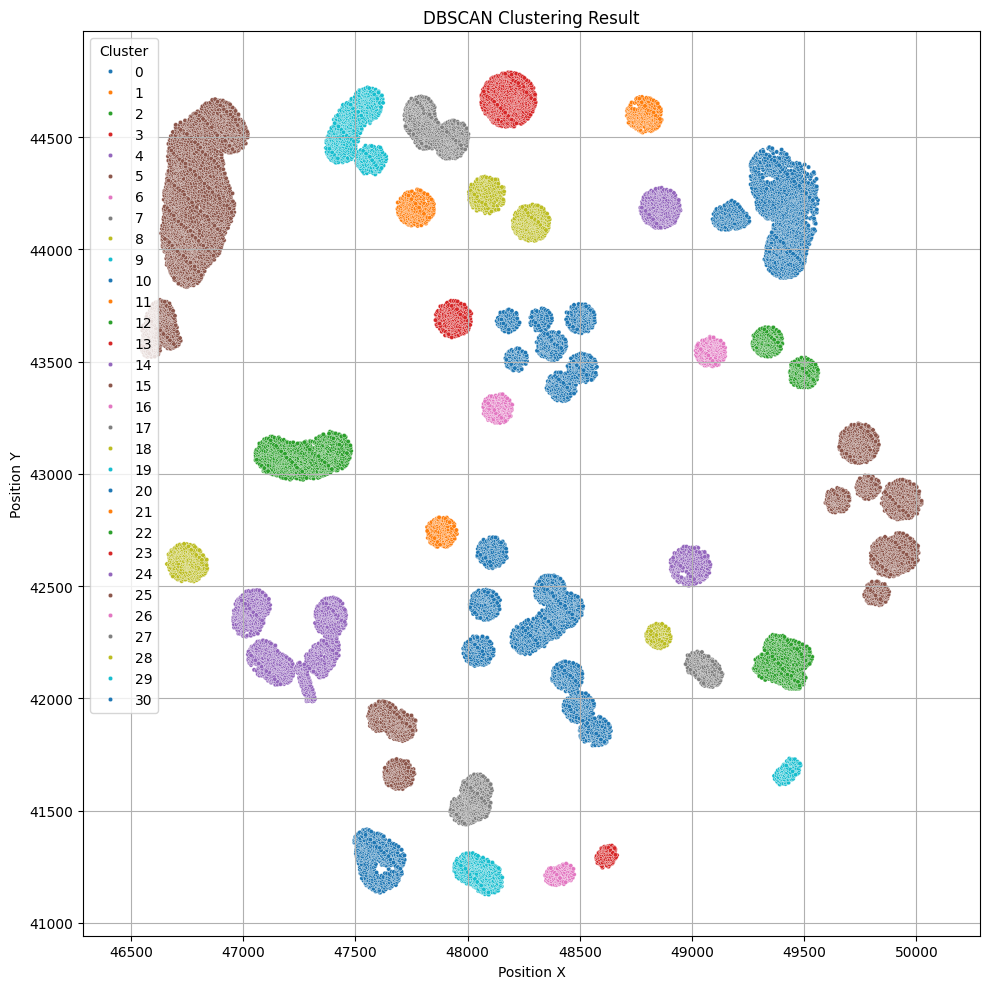

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

# Step 1: Prepare data
X = df[['Position X', 'Position Y']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply DBSCAN
# You may need to tune eps and min_samples based on your dataset's density
db = DBSCAN(eps=0.1, min_samples=50)  # Default values to start
labels = db.fit_predict(X_scaled)

# Step 3: Attach cluster labels
df['Cluster'] = labels

# Step 4: Plot
plt.figure(figsize=(10, 10))
sns.scatterplot(
    data=df,
    x='Position X',
    y='Position Y',
    hue='Cluster',
    palette='tab10',
    s=10,
    legend='full'
)
plt.title('DBSCAN Clustering Result')
plt.xlabel('Position X')
plt.ylabel('Position Y')
plt.axis('equal')
plt.grid(True)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


In [11]:
print(df.head())

   Position X  Position Y  Position Z Unit Category Collection  Time  ID  \
0   49529.578   44229.441       1.116   µm  Surface   Position     1   0   
1   49467.621   44290.391       0.977   µm  Surface   Position     1   1   
2   49515.867   44246.172       0.776   µm  Surface   Position     1   2   
3   49315.445   44443.277       2.803   µm  Surface   Position     1   3   
4   49557.926   44204.316       2.187   µm  Surface   Position     1   4   

   Unnamed: 8  Cluster  
0         NaN        0  
1         NaN        0  
2         NaN        0  
3         NaN        0  
4         NaN        0  


In [12]:
df2 = pd.read_csv('extra_stats2.csv')
print(df2.head())



            x           y        NND  LD_50um
0  274.406752  357.594683  33.516522        0
1  301.381688  272.441591  14.696908        0
2  211.827400  322.947057  19.750703        0
3  218.793606  445.886500   0.864418        1
4  481.831380  191.720759  34.484572        0


In [14]:
# Step 1: Rename df2 columns to match df
df2_renamed = df2.rename(columns={'x': 'Position X', 'y': 'Position Y'})

# Step 2: Merge on Position X and Position Y
merged_df = pd.merge(df, df2_renamed, on=['Position X', 'Position Y'], how='left')

# Step 3: Check result
merged_df.head()


,Position X,Position Y,Position Z,Unit,Category,Collection,Time,ID,Unnamed: 8,Cluster,NND,LD_50um
0,49529.578,44229.441,1.116,µm,Surface,Position,1,0,NaN,0,NaN,NaN
1,49467.621,44290.391,0.977,µm,Surface,Position,1,1,NaN,0,NaN,NaN
2,49515.867,44246.172,0.776,µm,Surface,Position,1,2,NaN,0,NaN,NaN
3,49315.445,44443.277,2.803,µm,Surface,Position,1,3,NaN,0,NaN,NaN
4,49557.926,44204.316,2.187,µm,Surface,Position,1,4,NaN,0,NaN,NaN
